# Train model on a given set for parameters

In [1]:
from main import runExperiment

In [2]:
# hyperparameters
hyparameters = {"epsilon" : 0.1, #ratio exploration / exploitation
"gamma": 1, # relative importance of future reward
"memorySize" : 10000, # size of replay memory
"sampleSize" : 500, # number of experience we learn on, randomly sampled on replay memory
"epoch" : 50}

runExperiment(hyparameters)

epoch 0 Loss= 0.29255918
epoch 1 Loss= 1617.4211
epoch 2 Loss= 507744.47
epoch 3 Loss= 58667.633
epoch 4 Loss= 292689.34
epoch 5 Loss= 3154.661
epoch 6 Loss= 359.52298
epoch 7 Loss= 245.55272
epoch 8 Loss= 242.47311
epoch 9 Loss= 171.76462
epoch 10 Loss= 132.48868
epoch 11 Loss= 134.49657
epoch 12 Loss= 103.047844
epoch 13 Loss= 212.92958
epoch 14 Loss= 170.89633
epoch 15 Loss= 169.72606
epoch 16 Loss= 129.25934
epoch 17 Loss= 166.39409
epoch 18 Loss= 112.228905
epoch 19 Loss= 198.37819
epoch 20 Loss= 121.23931
epoch 21 Loss= 149.2004
epoch 22 Loss= 99.72193
epoch 23 Loss= 81.32208
epoch 24 Loss= 103.298416
epoch 25 Loss= 81.976295
epoch 26 Loss= 91.138176
epoch 27 Loss= 95.5073
epoch 28 Loss= 76.578835
epoch 29 Loss= 39.492634
epoch 30 Loss= 49.205555
epoch 31 Loss= 67.4124
epoch 32 Loss= 42.91749
epoch 33 Loss= 53.892113
epoch 34 Loss= 59.431534
epoch 35 Loss= 57.77427
epoch 36 Loss= 49.911476
epoch 37 Loss= 44.00941
epoch 38 Loss= 34.327305
epoch 39 Loss= 45.408478
epoch 40 Loss= 29

# Explore model results

In [3]:
import os
from copy import deepcopy
import json
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from game import *
from neuralNetwork import *
from agent import *
from main import * 

In [4]:
modelDirectory = "model/"
os.listdir(modelDirectory)

['.gitkeep',
 '072774a6-0845-11ed-a586-7085c2a6b9e9',
 '4b692bfd-0847-11ed-a318-7085c2a6b9e9',
 '5ac7b359-0845-11ed-aca2-7085c2a6b9e9',
 '8937de11-0790-11ed-91a6-7085c2a6b9e9',
 '9866aaf9-0848-11ed-8555-7085c2a6b9e9',
 'e8a584a1-0848-11ed-9417-7085c2a6b9e9',
 'fab27a3f-0841-11ed-a907-7085c2a6b9e9']

In [5]:
# retrieve models at every training steps, and run hyperparameters

run_id = "5ac7b359-0845-11ed-aca2-7085c2a6b9e9"
modelPath = modelDirectory + run_id + "/"

with open(modelPath + "lossDict.pickle", "rb") as f:
    lossDict = pickle.load(f)
    
with open(modelPath + "modelWeightsDict.pickle", "rb") as f:
    modelWeightsDict = pickle.load(f)
    
with open(modelPath + "hyperparameters.json", "r") as f:
    hyperparameters = json.load(f)
    
print(hyperparameters)

{'epsilon': 0.1, 'gamma': 0.95, 'memorySize': 10000, 'sampleSize': 500, 'epoch': 50}


# Evolution of loss during training

Text(0, 0.5, 'Loss')

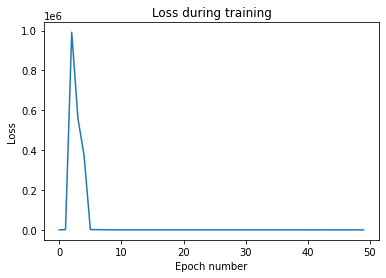

In [30]:
ax = plt.plot(lossDict.values())
plt.title("Loss during training")
plt.xlabel("Epoch number")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

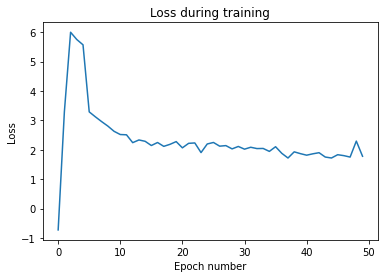

In [31]:
# same with log scale

val = [np.log10(el) for el in lossDict.values()]
ax = plt.plot(val)
plt.title("Loss during training")
plt.xlabel("Epoch number")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

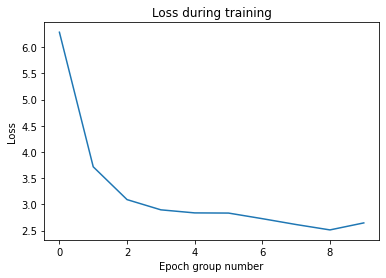

In [32]:
# log-average loss values, averaged over 5 epochs

val = np.array(list(lossDict.values()))
val = np.sum(val.reshape(-1, 5), axis=1) # average over 5 epochs
val = np.apply_along_axis(np.log10, 0, val) # take log
ax = plt.plot(val)
plt.title("Loss during training")
plt.xlabel("Epoch group number")
plt.ylabel("Loss")

# Study policy evolution

*Replay a game, with greedy policy*

*By retrieving Q model, at different steps of the training*

*And computing some KPIs to study the quality of policy at a given state*

In [33]:
env = gameEnvironmentClass() # same start game state

kpi1, kpi2, kpi3= {}, {}, {}

for e in range(hyperparameters["epoch"]):

    # greedy policy (eps = 0)
    agent = agentClass(epsilon=0, initial_env=deepcopy(env))

    # load model for epoch e
    policy_model = policyNetworkClass()
    policy_model.load_state_dict(modelWeightsDict[e])

    # select best-valued action, and play game until the end
    maxTry = 1000
    tryCount = 0
    while not gridIsFinished(agent.env.grid):
        if tryCount == maxTry:
            break
        tryCount += 1
        action = agent.choose_action(policy_model)
        reward = agent.interact(action)

    # add value for kpi, at the current epoch
    kpi1[e] = np.max(agent.env.grid) 
    kpi2[e] = np.sum(agent.env.grid)
    kpi3[e] = tryCount

In [34]:
# format metrics
kpi_df = pd.DataFrame(zip(kpi1.values(), kpi2.values(), kpi3.values()), 
                      columns=["max_tile", "sum_of_tile", "steps"])

## max tile by epoch

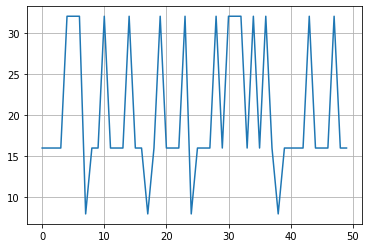

In [35]:
kpi_df.max_tile.plot()
plt.grid()

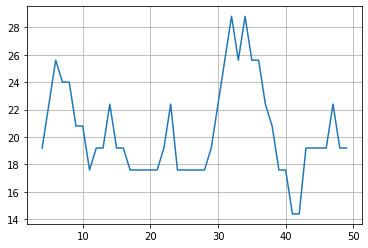

In [36]:
#smooth over 5 epochs

kpi_df.max_tile.rolling(5).mean().plot()
plt.grid()

## sum of tiles by epoch

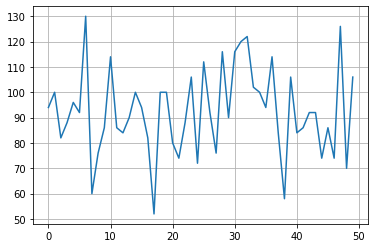

In [37]:
kpi_df.sum_of_tile.plot()
plt.grid()

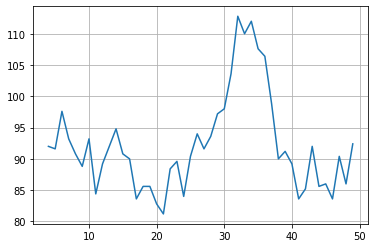

In [38]:
#smooth over 5 epochs

kpi_df.sum_of_tile.rolling(5).mean().plot()
plt.grid()

## total tries until game ends, by epoch

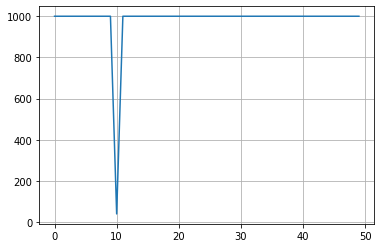

In [39]:
kpi_df.steps.plot()
plt.grid()